In [1]:
# import packages
import matplotlib.pyplot as plt
import math

# make a new function that calculates the distance between two points
def distance(x1, y1, x2, y2):
    result = math.sqrt(math.pow(x1 - x2, 2) + math.pow(y1 - y2, 2))
    return result

In [2]:
# three center points
c1 = (2, 10)
c2 = (5, 8)
c3 = (1, 2) 

# eight given points
p1 = (2, 5)
p2 = (8, 4)
p3 = (7, 5)
p4 = (6, 4)
p5 = (4, 9)
p6 = (2, 10) # 
p7 = (5, 8) #
p8 = (1, 2) #

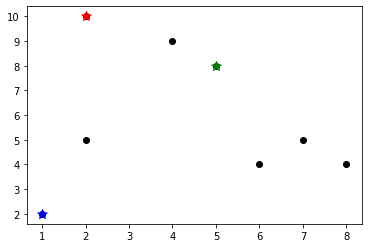

In [3]:
# Visualize the eight given coordinates with black dot
# three center points are displayed with each cluster color with star

plt.scatter(p1[0], p1[1], c = 'black')
plt.scatter(p2[0], p2[1], c = 'black')
plt.scatter(p3[0], p3[1], c = 'black')
plt.scatter(p4[0], p4[1], c = 'black')
plt.scatter(p5[0], p5[1], c = 'black')
plt.scatter(p6[0], p6[1], c = 'black')
plt.scatter(p7[0], p7[1], c = 'black')
plt.scatter(p8[0], p8[1], c = 'black')

plt.scatter(c1[0], c1[1], c = 'r', marker = '*', s = 100)
plt.scatter(c2[0], c2[1], c = 'g', marker = '*', s = 100)
plt.scatter(c3[0], c3[1], c = 'b', marker = '*', s = 100)
plt.show()

1 번째 점은 3 번째 Center와 가장 가깝습니다.
2 번째 점은 2 번째 Center와 가장 가깝습니다.
3 번째 점은 2 번째 Center와 가장 가깝습니다.
4 번째 점은 2 번째 Center와 가장 가깝습니다.
5 번째 점은 2 번째 Center와 가장 가깝습니다.
6 번째 점은 1 번째 Center와 가장 가깝습니다.
7 번째 점은 2 번째 Center와 가장 가깝습니다.
8 번째 점은 3 번째 Center와 가장 가깝습니다.
 
1 번째 클러스터 원소의 개수는 1
2 번째 클러스터 원소의 개수는 5
3 번째 클러스터 원소의 개수는 2
 


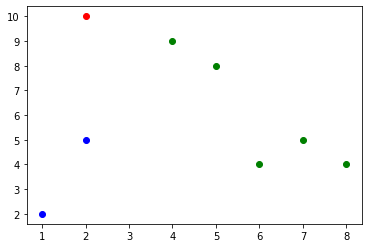

In [4]:
# make new empty lists, which distance value (distance between each points with 3 center points) will be stored
# (to make indexing each information more comfortable, make this list as two-dimention list)

c = [c1, c2, c3] # 'c' is a list that stores cordinates of three center points
p = [p1, p2, p3, p4, p5, p6, p7, p8] # 'p' is a list that stores cordinates of eight given points
pdis = []
n1 = []
n2 = []
n3 = []
m = [n1, n2, n3] # each lists will be stored in one large list
llistt = [] # save the number of how many we attempted the k-means process
cnt = 1 # this is first iteration

for i in list(range(len(p))):
  pdis.append([])
  for o in list(range(len(c))):
    pdis[i].append(distance(p[i][0], p[i][1], c[o][0], c[o][1]))

for i in list(range(len(p))): # eight process - results of which center point is nearest with each eight points
  print(i + 1, "번째 점은", pdis[i].index(min(pdis[i])) + 1, "번째 Center와 가장 가깝습니다.") # derive result through indexing
  if (pdis[i].index(min(pdis[i])) + 1) == 1: # if the point is closest to the first center point
    plt.scatter(p[i][0], p[i][1], c = 'r') # cluster it with red color
    n1.append(p[i]) # save the coordinates of the points(in the first cluster) in the n1 list
  if (pdis[i].index(min(pdis[i])) + 1) == 2: # if the point is closest to the second center point
    plt.scatter(p[i][0], p[i][1], c = 'g') # cluster it with green color
    n2.append(p[i]) # save the coordinates of the points(in the second cluster) in the n2 list
  if (pdis[i].index(min(pdis[i])) + 1) == 3: # if the point is closest to the third center point
    plt.scatter(p[i][0], p[i][1], c = 'b') # cluster it with blue color
    n3.append(p[i]) # save the coordinates of the points(in the third cluster) in the n3 list
 
print(" ")
for i in range(0, 3):
  print(i + 1, "번째 클러스터 원소의 개수는", len(m[i])) # save in each cluster's list & print how many elements (coordinates) each cluster contains
print(" ")
plt.show()

1 번째 iteration의 center point까지 : [[(2.0, 10.0), (6.0, 6.0), (1.5, 3.5)]]
 
1 번째 iteration


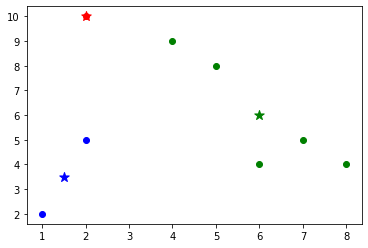

In [5]:
# with these result, we have to figure out new center point,
# which is the center of mass(weight center) of each cluster points

for i in list(range(1, 9)):
  if (pdis[i - 1].index(min(pdis[i - 1])) + 1) == 1: 
    plt.scatter(p[i - 1][0], p[i - 1][1], c = 'r')
  if (pdis[i - 1].index(min(pdis[i - 1])) + 1) == 2:
    plt.scatter(p[i - 1][0], p[i - 1][1], c = 'g') 
  if (pdis[i - 1].index(min(pdis[i - 1])) + 1) == 3:
    plt.scatter(p[i - 1][0], p[i - 1][1], c = 'b') 

list1 = [] # make a empty list to save X coordinates of each points
list2 = [] # make a empty list to save Y coordinates of each points

for o in list(range(len(c))): # index number (0~2) of new 3 center point
  list1.append([]) 
  list2.append([])
  for i in list(range(len(m[o]))): # run as number of elements in each cluster
    list1[o].append(m[o][i][0]) # For ease of indexing, create a two-dimensional list and store it in order for each cluster
    list2[o].append(m[o][i][1]) 
  if len(list1) == 0: # If the number of elements in a particular cluster is zero (though that won't happen), then proceed without running
    continue
  else: # Calculate the average value of coordinates in each cluster to create a new center point and store it to 'c'
    c[o] = (sum(list1[o]) / len(list1[o]), sum(list2[o]) / len(list2[o]))

# save the coordinates(center point) of first iteration
llistt.append(c)
print(cnt, "번째 iteration의 center point까지 :", llistt)
print(" ")
print(cnt, "번째 iteration")

# mark new center points in scatter plot
plt.scatter(c[0][0], c[0][1], c = 'r', marker = '*', s = 100)
plt.scatter(c[1][0], c[1][1], c = 'g', marker = '*', s = 100)
plt.scatter(c[2][0], c[2][1], c = 'b', marker = '*', s = 100)
plt.show()

# ⇑ 여기까지가 첫 번째 iteration

1 번째 점은 3 번째 Center와 가장 가깝습니다.
2 번째 점은 2 번째 Center와 가장 가깝습니다.
3 번째 점은 2 번째 Center와 가장 가깝습니다.
4 번째 점은 2 번째 Center와 가장 가깝습니다.
5 번째 점은 1 번째 Center와 가장 가깝습니다.
6 번째 점은 1 번째 Center와 가장 가깝습니다.
7 번째 점은 1 번째 Center와 가장 가깝습니다.
8 번째 점은 3 번째 Center와 가장 가깝습니다.
 
1 번째 클러스터 원소의 개수는 3
2 번째 클러스터 원소의 개수는 3
3 번째 클러스터 원소의 개수는 2
 
4 번째 iteration의 center point까지 : [[(3.6666666666666665, 9.0), (7.0, 4.333333333333333), (1.5, 3.5)], [(3.6666666666666665, 9.0), (7.0, 4.333333333333333), (1.5, 3.5)], [(3.6666666666666665, 9.0), (7.0, 4.333333333333333), (1.5, 3.5)], [(3.6666666666666665, 9.0), (7.0, 4.333333333333333), (1.5, 3.5)]]
 
4 번째 iteration


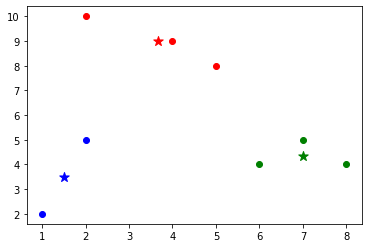

In [8]:
# After first iteration, the same process is repeated using a "while True:" sentence.
# it makes an infinite loop

cnt += 1

p = [p1, p2, p3, p4, p5, p6, p7, p8]
pdis = []
n1 = []
n2 = []
n3 = []
m = [n1, n2, n3]

for i in list(range(len(p))):
  pdis.append([])
  for o in list(range(len(c))):
    pdis[i].append(distance(p[i][0], p[i][1], c[o][0], c[o][1]))

for i in list(range(len(p))): 
  print(i + 1, "번째 점은", pdis[i].index(min(pdis[i])) + 1, "번째 Center와 가장 가깝습니다.") 
  if (pdis[i].index(min(pdis[i])) + 1) == 1: 
    plt.scatter(p[i][0], p[i][1], c = 'r') 
    n1.append(p[i])
  if (pdis[i].index(min(pdis[i])) + 1) == 2:
    plt.scatter(p[i][0], p[i][1], c = 'g') 
    n2.append(p[i]) 
  if (pdis[i].index(min(pdis[i])) + 1) == 3:
    plt.scatter(p[i][0], p[i][1], c = 'b') 
    n3.append(p[i]) 
  
print(" ")
for i in range(0, 3):
  print(i + 1, "번째 클러스터 원소의 개수는", len(m[i]))
print(" ")

list1 = [] 
list2 = [] 

for o in list(range(len(c))): 
  list1.append([]) 
  list2.append([])
  for i in list(range(len(m[o]))):
    list1[o].append(m[o][i][0])
    list2[o].append(m[o][i][1]) 
  if len(list1) == 0: 
    continue
  else: 
    c[o] = (sum(list1[o]) / len(list1[o]), sum(list2[o]) / len(list2[o]))

llistt.append(c)
print(cnt, "번째 iteration의 center point까지 :", llistt)
print(" ")
print(cnt, "번째 iteration")

plt.scatter(c[0][0], c[0][1], c = 'r', marker = '*', s = 100)
plt.scatter(c[1][0], c[1][1], c = 'g', marker = '*', s = 100)
plt.scatter(c[2][0], c[2][1], c = 'b', marker = '*', s = 100)
plt.show()